<a href="https://colab.research.google.com/github/desunny/example/blob/desunny-steel/(forS)_Lec06_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
  - 생선을 분류하는 문제 
  - 길이(Length), 높이(Height), 대각선(Diagonal), 두께(Width)를 특성(Features)으로 이용
  - 분류 타겟은 Bream(도미), Roach(잉어), Whitefish(송어), Parkki, Perch(농어), pike(강꼬치), smelt(빙어)
  


  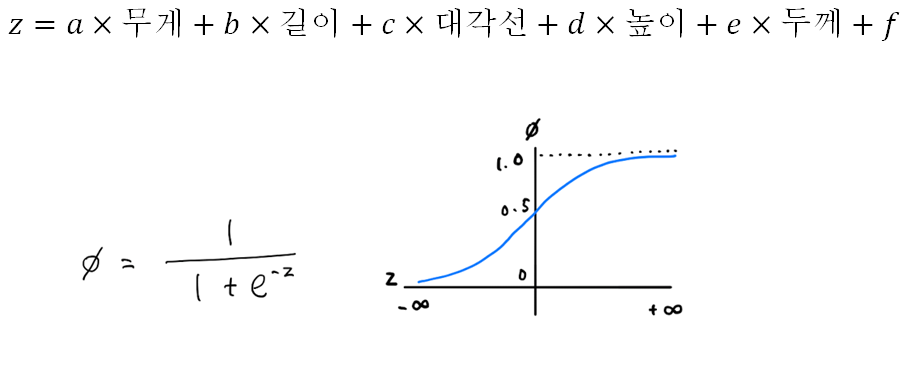

## 데이터 준비하기


In [ ]:
#판다스를 이용하여 데이터 로드 
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() #fish.head(n=3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(fish.shape)
print('--')
print(pd.unique(fish['Species'])) #고유한 값을 추출

(159, 6)
--
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# input 데이터 생성 
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# target 데이터 생성 
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
#학습및 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape, test_input.shape, train_target.shape)
print(train_input[:5])

(119, 5) (40, 5) (119,)
[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]


In [ ]:
#데이터 척도 표준화 - 값의 규모가 큰 혹은 작은 독립변수가 종속변수에 큰 영향을 주는 것을 방지하기 위해 척도를 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:5])


[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


## K 최근접 이웃의 다중분류

In [ ]:
# 근접한 이웃의 수에 따라서 분류하는 확률적 방법 
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


In [ ]:
print(kn.classes_) #타겟값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#테스트 데이터로 예측한 값 
print(kn.predict(test_scaled[:5])) 

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
#확률 출력 
import numpy as np 
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))


[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#네번재 샘플의 최근접 이웃 클래스 출력
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 1.실습
  - 1) K최근접 이웃의 값을 7로 변경하여 학습시키시오. 
  - 2) Train 스코어와 Test 스코어를 출력하시오. 
  - 3) test_scaled[3:4]의 분류 확률값을 출력하시오. 
  - 4) test_scaled[3:4]의 최근접 이웃 값을 출력하시오.

In [ ]:
# 1) k 최근접 이웃 7로 학습


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
# 2)Train , Test 스코어 출력 


0.8319327731092437
0.85


In [ ]:
# 3)확률값 출력 


[[0.   0.   0.86 0.   0.14 0.   0.  ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 4)Test_scaled[3:4]의 최근접 이웃 값 출력 


[['Roach' 'Perch' 'Perch' 'Perch' 'Perch' 'Roach' 'Whitefish']]


## 로지스틱 회귀로 이진 분류 수행하기
  - bream(도미), smelt(빙어)로 이진 분류 수행하기
  - 도미와 빙어 데이터만 별도로 구분하여 학습

In [ ]:
#도미와 빙어 데이터 구분하기 
bream_smelt_indexes = (train_target=='Bream')  | (train_target =="Smelt") #Bream, Smelt 데이터의 불린 인덱스 추출하기 

print(bream_smelt_indexes[:5])

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt[:5])
print(target_bream_smelt[:5])

[ True False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
#로지스틱 회귀 학습 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.score(train_bream_smelt, target_bream_smelt))

print(lr.predict(train_bream_smelt[:5])) 
print(lr.predict_proba(train_bream_smelt[:5])) #확률 값 출력 



1.0
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
#로지스틱 회귀 계수 확인
print(lr.classes_)
print(lr.coef_, lr.intercept_)

['Bream' 'Smelt']
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


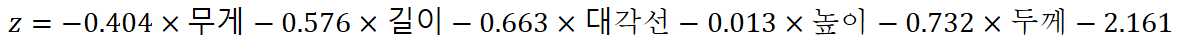

In [ ]:
# Z 값 계산하기 
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

#시그모이드 값으로 확률로 변경하기  
from scipy.special import expit #expit 시그모이드 함수 
print(expit(decisions)) 

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 2.실습
  - Roach(잉어), Whitefish(송어)로 이진분류를 수행하시오.  

In [ ]:
# 1. 데이터 준비하기 - 잉어와 송어 데이터 구분하기 


[False False False False False  True False False False False]
(20, 5)
--
[[-0.9127463  -0.96490079 -0.95281644 -0.88017186 -0.99153566]
 [-0.79734143 -0.72125409 -0.70961249 -0.66547436 -0.64163638]
 [-0.69882508 -0.60880176 -0.60538223 -0.55034671 -0.54891916]
 [-1.10696425 -0.74936717 -0.73567006 -0.58953752 -0.66851888]
 [-0.7691939  -0.7962223  -0.78778519 -0.65354672 -0.53282624]]
--
['Roach' 'Roach' 'Roach' 'Roach' 'Roach']


In [ ]:
# 2.학습하기 


0.95
['Roach' 'Roach' 'Roach' 'Roach' 'Roach']
[[0.982604   0.017396  ]
 [0.96548272 0.03451728]
 [0.95383435 0.04616565]
 [0.97190941 0.02809059]
 [0.96383145 0.03616855]]


In [ ]:
#3.점수(score), 예측값, 예측확률 출력하기


0.95
['Roach' 'Roach' 'Roach' 'Roach' 'Roach']
[[0.982604   0.017396  ]
 [0.96548272 0.03451728]
 [0.95383435 0.04616565]
 [0.97190941 0.02809059]
 [0.96383145 0.03616855]]


## 로지스틱 회귀로 다중 분류 수행하기 

In [ ]:
#학습하기 
lr = LogisticRegression(C=20, max_iter=1000) #C - 학습 규제 강도 (큰 숫자 Overfitting 방지) 기본:1 , max_iter 반복의 횟수 기본 : 100
lr.fit(train_scaled, train_target)


LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#테스트 데이터 분류하기 
print(lr.score(train_scaled, train_target))
print(lr.predict(test_scaled[:5]))

In [ ]:
#확률 출력 
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 분류 클래스 
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
#계수와 절편의 형태 - 7행, 5열 / 7행: z값 7개-분류별로 z값을 구하였음, 5열: 특성 5개 
print(lr.coef_.shape, lr.intercept_.shape)


(7, 5) (7,)


In [ ]:
# z 값
decision = lr.decision_function(test_scaled[:5]) #z1~z7개의 값
print(np.round(decision, decimals=2)) #z1~z7개의 값 출력 

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# 시그모이드 값 
from scipy.special import softmax #(다중 분류에서는 softmax 함수 사용) #softmax는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만드는 함수 
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


### 3.실습
  - Bream(도미), Smelt(빙어), Roach(잉어), Whitefish(송어)를 추출하여 다중분류를 수행하시오. 

In [ ]:
# 1. 데이터 준비하기 
# 불린 인덱스 생성 (#도미와 빙어 데이터 구분하기 참조)


# 학습용 데이터 추출 


# 학습, 테스트용 데이터 분리 


[ True False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.9127463  -0.96490079 -0.95281644 -0.88017186 -0.99153566]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]]
--
['Bream' 'Smelt' 'Roach' 'Bream' 'Bream']
(42, 5) (42,)
--
(11, 5)


In [ ]:
# 2. 학습하기, 규제는 20, max_iter=1000




LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 3. 학습 스코어 출력하기 
# 훈련 데이터 스코어 출력

# 테스트 데이터 스코어 출력 


0.9761904761904762
1.0


In [ ]:
# 4. 다중분류하기 
# 테스트 데이터로 클래스 다중분류하기 



['Perch' 'Whitefish' 'Smelt' 'Roach' 'Bream']
